In [75]:
import keras
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
keras.__version__
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras import regularizers
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from PIL import ImageFile
import pandas as pd
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

W0710 08:09:38.686510 139897581942592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 08:09:39.062173 139897581942592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 08:09:39.097543 139897581942592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 08:09:39.242161 139897581942592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 08:09:40.399504 139897581942592 deprecation_wrapp

In [4]:
base_dir = '/home/jose/Desktop/ship_dataset_6500_1000_625_yacht_tanker'

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [14]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                131088    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 14,846,065
Trainable params: 131,377
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
conv_base.trainable = False

In [17]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [18]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 13000 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

W0710 08:11:51.930866 139897581942592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 08:11:51.941192 139897581942592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 215s - loss: 0.6957 - acc: 0.6530 - val_loss: 0.6401 - val_acc: 0.7630
Epoch 2/30
 - 217s - loss: 0.6239 - acc: 0.7420 - val_loss: 0.6049 - val_acc: 0.7410
Epoch 3/30
 - 217s - loss: 0.5795 - acc: 0.7705 - val_loss: 0.5506 - val_acc: 0.8010
Epoch 4/30
 - 217s - loss: 0.5328 - acc: 0.8080 - val_loss: 0.5147 - val_acc: 0.8110
Epoch 5/30
 - 217s - loss: 0.5249 - acc: 0.7885 - val_loss: 0.4724 - val_acc: 0.8420
Epoch 6/30
 - 217s - loss: 0.4789 - acc: 0.8335 - val_loss: 0.4249 - val_acc: 0.8710
Epoch 7/30
 - 217s - loss: 0.4802 - acc: 0.8165 - val_loss: 0.3982 - val_acc: 0.8880
Epoch 8/30
 - 217s - loss: 0.4291 - acc: 0.8615 - val_loss: 0.3866 - val_acc: 0.8800
Epoch 9/30
 - 218s - loss: 0.4264 - acc: 0.8475 - val_loss: 0.3791 - val_acc: 0.8760
Epoch 10/30
 - 217s - loss: 0.4074 - acc: 0.8510 - val_loss: 0.3405 - val_acc: 0.8970
Epoch 11/30
 - 216s - loss: 0.4079 - acc: 0.8550 - val_loss: 0.3403 - val_acc: 0.8860
Epoch 12/30
 - 216s - loss: 0.3828 - acc: 0.8715 - val_loss: 0.

In [25]:
model.save(' overfitting_adding_weight_regularization_L2_1.h5')

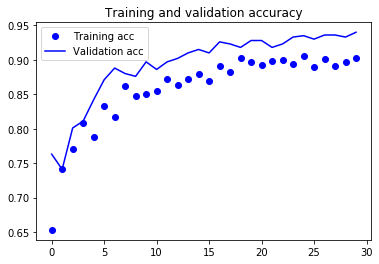

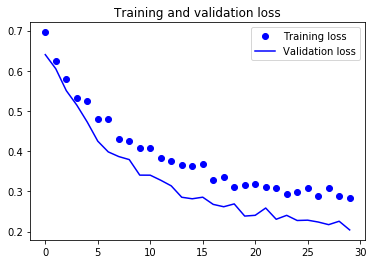

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.
test acc: 0.9459999942779541


# PREDICTION

In [4]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
import operator
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.transform import resize
import matplotlib.pyplot as plt


In [31]:
my_image = plt.imread("tanker.jpeg")

In [32]:
my_image_resized = resize(my_image, (150,150,3))

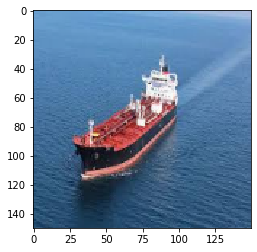

In [33]:
img = plt.imshow(my_image_resized)

In [45]:
import numpy as np

model = load_model(' overfitting_adding_weight_regularization_L2_1.h5')

probabilities = model.predict(np.array( [my_image_resized,] ))


probabilities


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


array([[0.29757896]], dtype=float32)

In [46]:
probabilities1 = model.predict_proba(np.array( [my_image_resized,] ))
probabilities1


array([[0.29757896]], dtype=float32)

In [37]:
probabilities


array([[0.29757896]], dtype=float32)

In [47]:

number_to_class = ['tanker', 'yatch']
index = np.argsort(probabilities[0,:])
print(index)
print("Most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])

[0]
Most likely class: tanker -- Probability: 0.29757896


IndexError: index 1 is out of bounds for axis 0 with size 1

In [25]:
img = cv2.imread('tanker.jpeg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print(classes)

[[0]]


In [88]:
num_of_test_samples = 2000
batch_size = 20

predictions = model.predict_generator(validation_generator, 2000 // 20 )
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()
print(class_names)

dict_keys(['tanker', 'yacht'])


<Figure size 432x288 with 0 Axes>

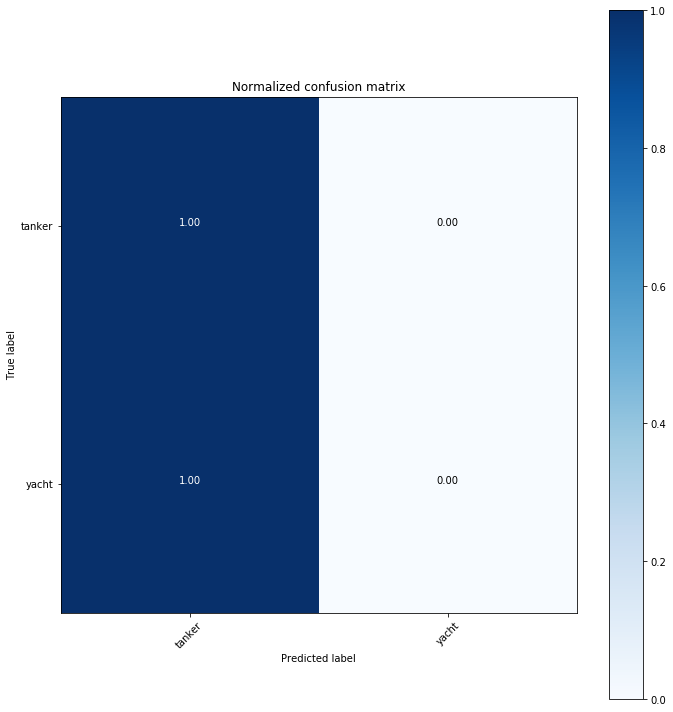

In [89]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()